# Your Title Here

**Ethan Shapiro,** **Megan Huynh**

## Summary of Findings

### Introduction
This dataset contains information about civilian complaints made from September 1985 to January 2020 against New York City police officers. The New York City's
Civilian Complaint Review Board (CCRB) must make a decision as to whether the alleged incident happened and if the officer's conduct violated the NYPD's rules.
Additionally, the data includes information about the officer and complainant, such as their age, race, gender, and ethnicity, along with other descriptors
used to classify the case. We wanted to investigate the question "Does the outcome of the complaint depend on the length the case was open?", and so we were able
to utilize information from the dataset to perform our analysis.

Relevant columns from dataset:
- <b>month_received</b>
   - the month the complaint was received by the CCRB
- <b>year_received</b>
   - the year the complaint was received by the CCRB
- <b>month_closed</b>
   - the month the complaint was closed by the CCRB
- <b>year_closed</b>
   - the year the complaint was closed by the CCRB
- <b>complainant_ethnicity</b>
   - the ethnicity of the person filing the complaint
- <b>complainant_gender</b>
   - the gender of the person filing the complaint
- <b>complainant_age_incident</b>
   - the age of the person when they filed the complaint
- <b>board_disposition</b>
   - conclusion made by the CCRB
- <b>fado_type</b>
   - type of complaint made

### Cleaning and EDA
We performed cleaning on 3 different complainant columns:
 - ethnicity
    - There were missing ethnicities labeled as "Unknown", so we changed those to NaN
    - We were not working with ethnicities, so there was no reason to impute these values
 - gender
    - There were missing genders labeled as "Unknown", so we changed those to be NaN
    - We were not working with genders, so there was no reason to impute these values
 - age
    - There were negative or 0 ages which aren't possible, so we changed those to NaN
    - We did not impute these values because we did not use them to answer our question in the beginning
    - There were also ages which were 5 or less, but we can't say for certain someone that age didn't make a complaint, so we didn't change those values.
 
 Since ethnicity, gender, and age are all reported by the complainant, they can choose not to give this information, which is why certain
 complaints do not include these attributes.

Next, we engineered two different features:
   - Duration the complaint was open
      - We used the complaint received date and the complaint closed date to get the number of days the complaint was open
   - Complaint Outcome
      - We used the original complaint outcome which contained a lot of sub-categories. We removed those categories and simplified it to either an action taken or not.

### Assessment of Missingness
To assess the missing ages, we looked at two other columns: <b>fado_type</b> and <b>month_received</b>.
1. We conducted two permutation tests (one for each column), stating our null and alternative hypotheses, and using the TVD as our test statistic.
2. From the permutation tests, we calculated our p-values with a statistical significance of 0.05.

- For <b>fado_type</b>, we rejected the null hypothesis, meaning age missingness is MAR dependent on <b>fado_type</b>.
- For <b>month_received</b>, we failed to reject the null hypothesis, and cannot say that age missingness is MAR dependent on <b>month_received</b>

### Permutation Test
In our permuation test, we wanted to answer the question "Does the outcome of the complaint depend on the length the case was open?".
1. Hypotheses:

   Null Hypothesis: In the population, the duration of the complaint for each complaint outcome is from the same distribution.

   Alternative Hypothesis: The duration of complaint for each outcome, come from different distributions.

2. Test statistic:

   Absolute Difference in Means

3. Significance Level:

   alpha = 0.05

4. Results:

   p-value < 0.01

5. Conclusion:

   We reject the null hypothesis in favor of the alternative. This suggests that the distribution of the duration of the complaint is different depending if the outcome was action taken or no action taken.


## Code

Relevant Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

### Cleaning and EDA

Read in the data

In [6]:
# Reading in the csv
df = pd.read_csv('allegations_202007271729.csv')

In [24]:
df['outcome_description'].value_counts()

No arrest made or summons issued        12822
Arrest - other violation/crime          10196
Summons - disorderly conduct             2118
Summons - other violation/crime          1940
Arrest - resisting arrest                1593
Arrest - disorderly conduct              1013
Arrest - assault (against a PO)           852
Moving violation summons issued           839
Arrest - OGA                              649
Other VTL violation summons issued        531
Parking summons issued                    279
Disorderly-Conduct/Arr/Summons            137
Arrest on Other Charge                     81
Traffic Summons Claimed or Issued          59
Juvenile Report                            57
Other Summons Claimed or Issued            38
Assault/Arrested                           34
Resisting Arrest/Arrested                  25
Arrest - harrassment (against a PO)        15
Obstruct-Govt-Admin/Arrested               10
Harrassment/Arrested/Summons                8
Summons - harrassment (against a P

In [7]:
df.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


Check for missing values in each column

In [8]:
# Check for missingness by column
df.isna().sum().loc[df.isna().sum() > 0]

command_at_incident         1544
complainant_ethnicity       4464
complainant_gender          4195
complainant_age_incident    4812
allegation                     1
precinct                      24
contact_reason               199
outcome_description           56
dtype: int64

Replace Unkown ethnicity with NaN

In [9]:
# Replace Unknown ethnicity with NaN
df['complainant_ethnicity'] = df['complainant_ethnicity'].apply(lambda x: x if x != 'Unknown' else np.NaN)

Replace Unknown Gender with NaN

In [10]:
# Replace Unknown gender with NaN
df['complainant_gender'] = df['complainant_gender'].apply(lambda x: x if x != 'Unknown' else np.NaN)

Replace negative ages with NaN

In [11]:
# Replace Negative and 0 Ages with NaN
df.loc[(df['complainant_age_incident'] <= 0), ['complainant_age_incident']] = np.NaN

Create Duration of complaint column
<br>
We assume that the complaint was opened on the first day of the month since the day is not provided

In [12]:
# Creates duration_of_complaint column in days
opened_date = pd.to_datetime(df[['month_received', 'year_received']].rename(columns={'month_received':'month', 'year_received':'year'}).assign(day=1))
closed_date = pd.to_datetime(df[['month_closed', 'year_closed']].rename(columns={'month_closed':'month', 'year_closed':'year'}).assign(day=1))
df['duration_of_complaint'] = (closed_date - opened_date).apply(lambda x: x.days)

Remove unnecessary specification from the board_disposition column and create complaint_outcome column

In [13]:
# Replaces any charcters included in () with empty string
df['complaint_outcome'] = df['board_disposition'].str.replace(r'\b (.+)', '', regex=True)

Replace values with action or no action taken

In [14]:
# Replacing values with our values
df['complaint_outcome'] = df['complaint_outcome'].replace({'Substantiated': 'action taken',
                                                             'Unsubstantiated': 'no action taken',
                                                             'Exonerated': 'no action taken'})
df['complaint_outcome'].unique()

array(['action taken', 'no action taken'], dtype=object)

In [31]:
df['complaint_outcome'].value_counts()

no action taken    25057
action taken        8301
Name: complaint_outcome, dtype: int64

### Univariate, Bivariate, and Aggregate Analysis of Relevant Columns

We can see that Abuse of Authority is by far the most common type of complaint.

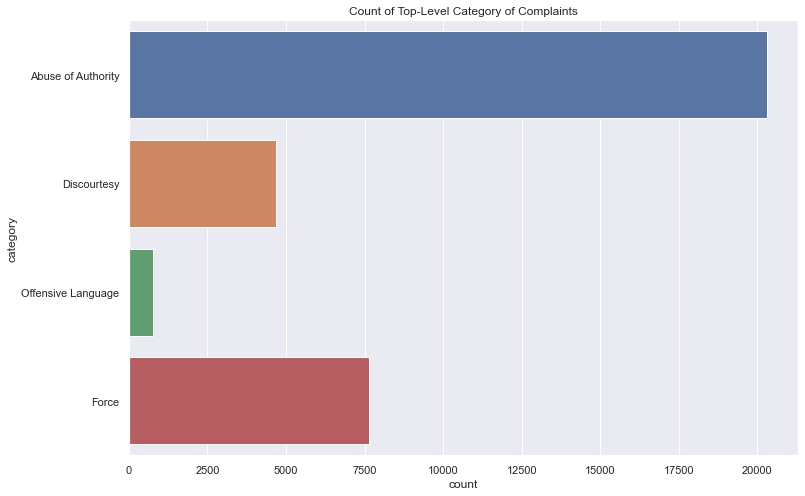

In [4]:
# Create a countplot of each complaint category
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(data=df, y='fado_type')
ax.set(title='Count of Top-Level Category of Complaints', ylabel='category')
plt.show()

We can see that the majority of ages peak between 20 and 40 years old.

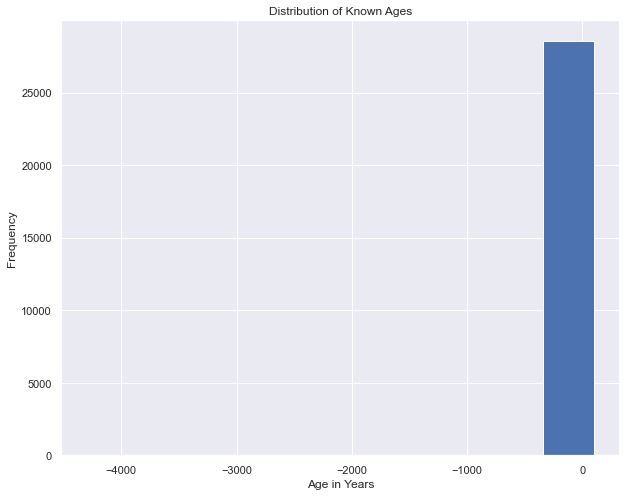

In [5]:
# Creates a histogram of the ages
ax = df['complainant_age_incident'].plot(kind='hist', title='Distribution of Known Ages', figsize=(10, 8))
ax.set_xlabel('Age in Years')
plt.show()

This shows the number of times a complaint was filed on a given month. 

We can see that the highest month is February and that the end of the year is typically the lowest, but each month is pretty similar on average.

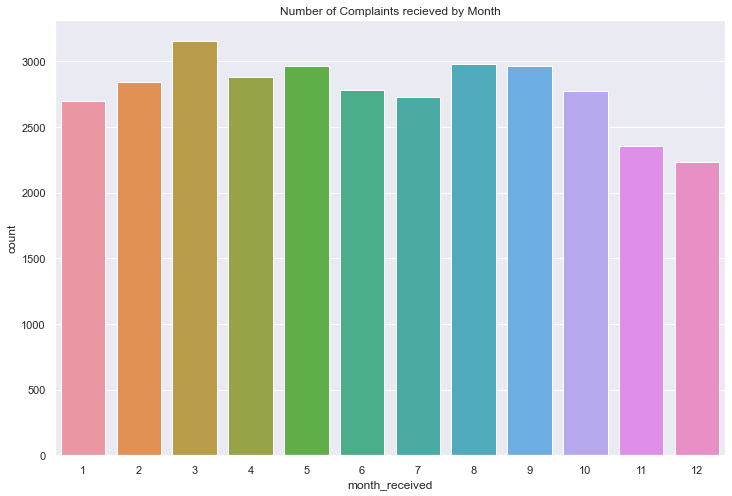

In [149]:
# Plot countplot of complaints received month
ax = sns.countplot(x='month_received', data=df)
ax.set(title='Number of Complaints recieved by Month')
plt.show()

This is the original distribution which has a few extremely long durations. Majority of our durations are between 0 and 1000.

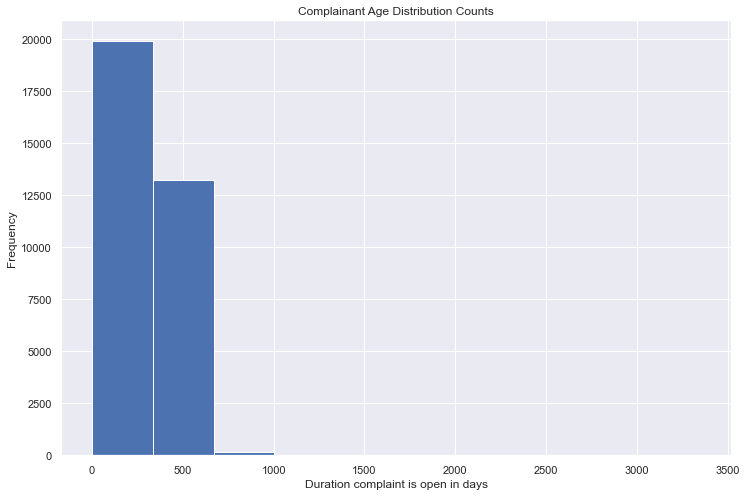

In [ ]:
# Plot histogram of complainant ages
ax = df['duration_of_complaint'].plot(kind='hist', title='Complainant Age Distribution Counts')
ax.set_xlabel('Duration complaint is open in days')
plt.show()

Here we look up to the 97th percentile of durations to get a better look at our duration distributions

The distributions look to be bimodal, with one obvious peak at around 200 days and another at 350-400 days.

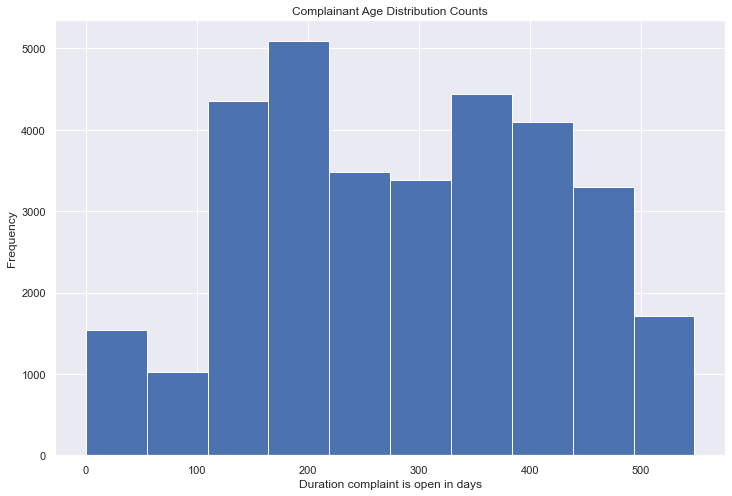

In [ ]:
# Plot histogram of complainant ages
ax = df[df['duration_of_complaint'] <= np.percentile(df['duration_of_complaint'], 97)]['duration_of_complaint'].plot(kind='hist', title='Complainant Age Distribution Counts')
ax.set_xlabel('Duration complaint is open in days')
plt.show()

Here we group the ages into bins to see the most common fado type for each age bin

In [ ]:
# Create age bins
df['age_bin'] = pd.cut(df['complainant_age_incident'], 10)

def get_max_category(group):
    return group.sort_values('first_name').iloc[-1]

# group by age bins
max_per_age = df.groupby(['age_bin', 'fado_type']).count()[['first_name']].reset_index().groupby('age_bin').apply(get_max_category).reset_index(drop=True)

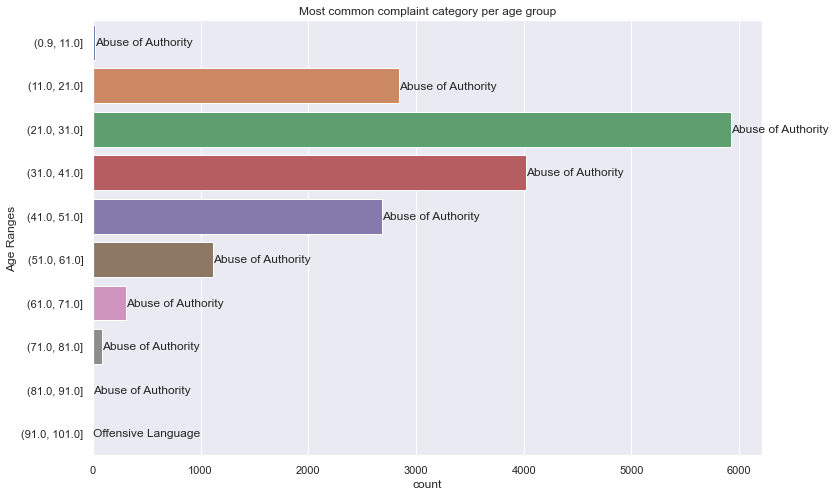

In [ ]:
# Plot the counts according to fado type
ax = sns.barplot(data=max_per_age, x='first_name', y='age_bin')
ax.bar_label(container=ax.containers[0], labels=max_per_age['fado_type'].values)
ax.set(title='Most common complaint category per age group', ylabel='Age Ranges', xlabel='count')
plt.show()

Since we know "Abuse of Authority" is the most common complaint type, this can show if anyone age bins have a significant number of any other category.

As we can see though, the distribution of the other complaints is fairly similar for each.

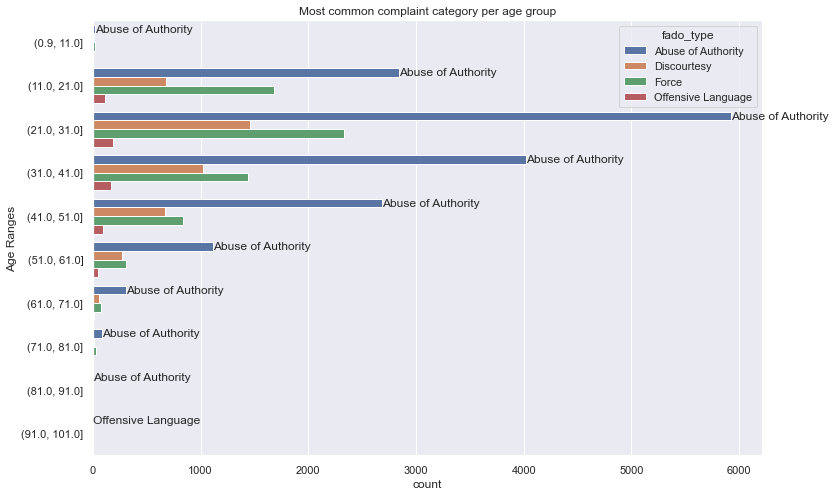

In [ ]:
# group by age bins
categories_by_age = df.groupby(['age_bin', 'fado_type']).count()[['first_name']].reset_index()
ax = sns.barplot(data=categories_by_age, x='first_name', y='age_bin', hue='fado_type')
ax.bar_label(container=ax.containers[0], labels=max_per_age['fado_type'].values)
ax.set(title='Most common complaint category per age group', ylabel='Age Ranges', xlabel='count')
plt.show()

### Assessment of Missingness

Possible NMAR columns

Revisiting the missingness by column as a reminder

In [ ]:
# Check for missingness by column
df.isna().sum().loc[df.isna().sum() > 0]

command_at_incident         1544
complainant_ethnicity       4464
complainant_gender          4195
complainant_age_incident    4820
allegation                     1
precinct                      24
contact_reason               199
outcome_description           56
age_bin                     4820
dtype: int64

## Which columns do we think could be NMAR

### Command at incident: 
<p>We think it could be NMAR because they might not include the officer's command at the incident if they were not doing what they were supposed to be doing at the instance of the complaint.<p/>

### Complainant Ethnicity: 
<p>We think this could be NMAR because the complainant might believe having a certain ethnicity would negatively affect the outcome of their complaint, so they choose to not include it.<p/>
 
### Complainant Age: 
<p>We think this column could be NMAR because the complainant might belive being a certain age might negatively affect the outcome of their complaint, therefore they chose not to include it.<p/>

### Complainant Gender: 
<p>We think this column could be NMAR because the complainant might belive being a certain gender might negatively affect the outcome of their complaint, therefore they didn't include their gender.<p/>

Helper function for permutation tests

In [143]:
# This is a function to compute the TVD between age missingness and the given index column name
def compute_tvd(shuffled, index):
    pv_table = shuffled.pivot_table(index=index, columns='age_missing', values='complainant_age_incident', aggfunc='size')
    return pv_table.div(pv_table.sum(axis=1), axis=0).diff(axis=1).abs().sum().iloc[-1] / 2

NOTE: In each permutation test ran from here onward, we use a significance of 0.05.

### Permutation Test with age missingness and fado_type

<b>Null Hypothesis:</b> In the population, missingness of age is the same for each complaint type. The difference is due to random chance.

<b>Alternative Hypothesis:</b> Missingness of age is dependent on complaint type.

<b>Test statistic:</b> Total Variation Distance

First we extract our relevant columns and make a plot to see how our age missingness is distributed amongst our complaint types.

As we can see, it seems to follow the fact that since Abuse of Authority has the most entries, that is the most missing.

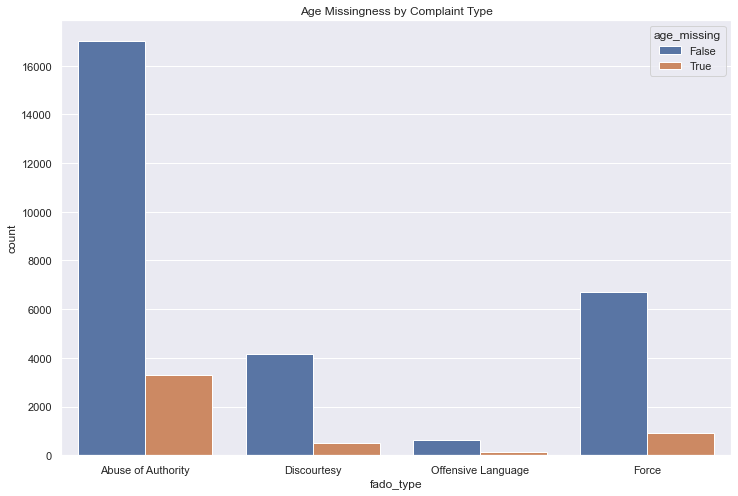

In [150]:
# Create a copy of our relevant columns and create an age missingness boolean column
perm_df = df[['fado_type', 'complainant_age_incident']].copy()
perm_df['age_missing'] = perm_df['complainant_age_incident'].isna()

# Plot histogram of complainant age missingness by
ax = sns.countplot(x='fado_type', hue='age_missing', data=perm_df)
ax.set(title='Age Missingness by Complaint Type')
plt.show()

This is where we run the permutation test to see if our null hypothesis holds

In [ ]:
# Copy the df columns needed and input missingness column
perm_df = df[['fado_type', 'complainant_age_incident']].copy()
original_missingness = perm_df['complainant_age_incident'].isna()
perm_df['age_missing'] = original_missingness

# Find observed test stat
obv_stat_1 = compute_tvd(perm_df, 'fado_type')

# Run 1000 permutation tests to get t_stats
t_stats_1 = np.array([])
for _ in range(1000):
    # create a new sample from original
    perm_df['age_missing'] = original_missingness.sample(frac=1).reset_index(drop=True)
    
    # compute a new tvd
    new_tvd = compute_tvd(perm_df, 'fado_type')
    
    # Add to stats
    t_stats_1 = np.append(t_stats_1, new_tvd)

In [ ]:
# Compute p-value
(t_stats_1 >= obv_stat_1).mean()

0.001

With a p-value = 0.001 < 0.05, we reject the null hypothesis and say that age missingness is MAR dependent on fado type.

### Permutation Test with age missingness and the month the complaint was received

<b>Null Hypothesis:</b> In the population, missingness of age is the same for each the month the complaint is received. The difference is due to random chance.

<b>Alternative Hypothesis:</b> Missingness of age is dependent on month recieved.

<b>Test statistic:</b> Total Variation Distance

Once again, we extract our relevant columns and make a plot to see how our age missingness is distributed amongst our complaint month received.

In this case, missingness seems to be evenly distributed amongst the months.

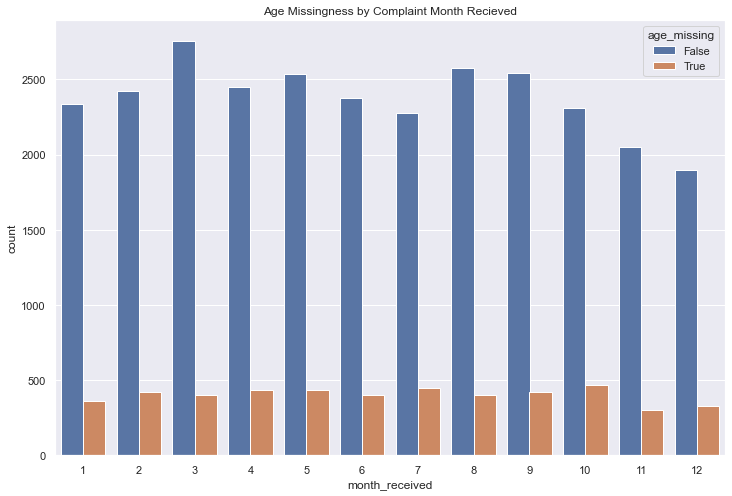

In [146]:
# Extract our relevant columns
perm_df = df[['month_received', 'complainant_age_incident']].copy()
perm_df['age_missing'] = perm_df['complainant_age_incident'].isna()

# Plot histogram of complainant age missingness by
ax = sns.countplot(x='month_received', hue='age_missing', data=perm_df)
ax.set(title="Age Missingness by Complaint Month Recieved")
plt.show()

Once again, we run a permutation test to check if the null holds up

In [ ]:
# Copy the df columns needed and input missingness column
perm_df = df[['month_received', 'complainant_age_incident']].copy()
original_missingness = perm_df['complainant_age_incident'].isna()
perm_df['age_missing'] = original_missingness

# Find observed test stat
obv_stat_2 = compute_tvd(perm_df, 'month_received')

# Run 1000 permutation tests to get t_stats
t_stats_2 = np.array([])
for _ in range(1000):
    # create a new sample from original
    perm_df['age_missing'] = original_missingness.sample(frac=1).reset_index(drop=True)
    
    # compute a new tvd
    new_tvd = compute_tvd(perm_df, 'month_received')
    
    # Add to stats
    t_stats_2 = np.append(t_stats_2, new_tvd)

In [ ]:
# Compute p-value
(t_stats_2 >= obv_stat_2).mean()

0.72

With a p-value = 0.736 > 0.05, we fail to reject our null hypothesis. We can't say that age missingness is MAR dependent on the month the complaint was received.

### Permutation Testing

Does the outcome of the complaint depend on the length the case was open?

We can see that the distributions look similar and aren't smooth because we assign each complaint received day to be 1.

Also note that there are duration lengths greater than 1000, but including them made the plot difficult to interpret.

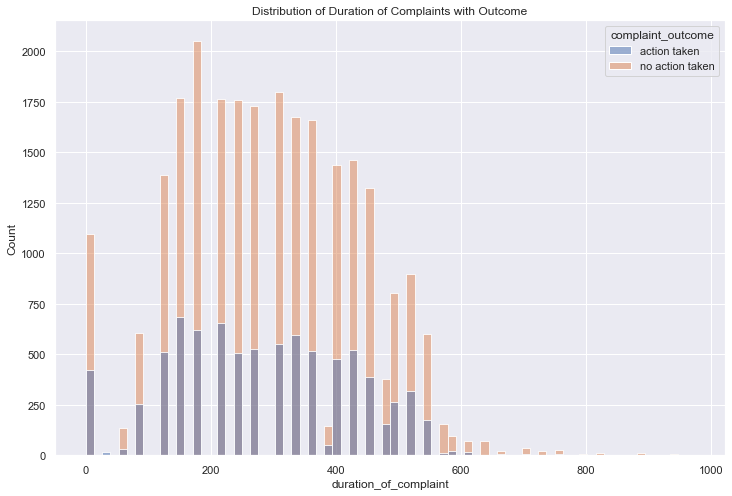

In [ ]:
# Plot the distributions of complaint lengths with outcome hue
ax = sns.histplot(data=df[df['duration_of_complaint'] < 1000], x='duration_of_complaint', hue='complaint_outcome')
ax.set(title='Distribution of Duration of Complaints with Outcome')
plt.show()

### Permutation Test with duration of complaint and outcome of the complaint

<b>Null Hypothesis:</b> In the population, the duration of the complaint for each complaint outcome is from the same distribution.

<b>Alternative Hypothesis:</b> The duration of complaint for each outcome, come from different distributions.

<b>Test statistic:</b> Absolute Difference in Means

Helper Function for our permutation test

In [147]:
# A helper function to compute our absolute difference in means
def abs_diff_means(shuffled):
    return shuffled.groupby('shuffled_outcomes')['duration_of_complaint'].mean().diff().abs().iloc[-1] 

For the third time, we run a permutation test to see if our null hypothesis holds up

In [ ]:
# Copy our relevant columns
hyp_3 = df[['duration_of_complaint', 'complaint_outcome']].copy()
hyp_3['shuffled_outcomes'] = df['complaint_outcome']

# Get observed stat
obv_stat_3 = abs_diff_means(hyp_3)

# Run simulations
test_stats = np.array([])
for _ in range(10_000):
    # shuffle
    hyp_3['shuffled_outcomes'] = df['complaint_outcome'].sample(frac=1).reset_index(drop=True)
    
    # Calculate new test stat
    new_stat = abs_diff_means(hyp_3)
    
    # Add test stats to array
    test_stats = np.append(test_stats, new_stat)

Checking to see the p-value

In [ ]:
# Must find the values that are as weird or weirder than our observed statistic
(test_stats >= obv_stat_3).mean()

0.0

Showing our test statistic distribution with our observed statistic

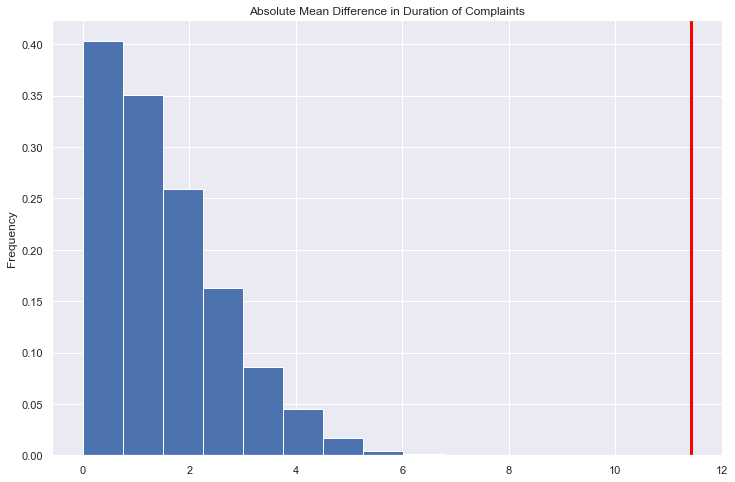

In [ ]:
title = 'Absolute Mean Difference in Duration of Complaints'
pd.Series(test_stats).plot(kind='hist', density=True, ec='w', bins=10, title=title)
plt.axvline(x=obv_stat_3, color='red', linewidth=3);

Since our p-value <= 0.01 < 0.05, we reject the null hypothesis in favor of the alternative. This suggests that the distribution of the duration of the complaint is different depending if the outcome was action taken or no action taken.